# Training Deep Neural Networks

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

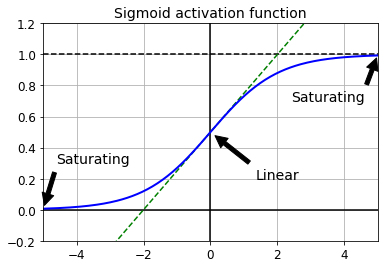

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

In [7]:
keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

## Nonsaturating Activation Functions

In [8]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

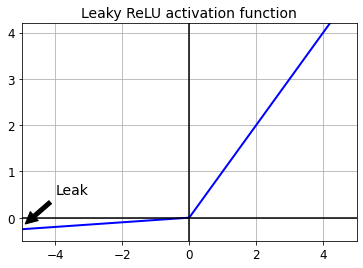

In [9]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [10]:
[name for name in dir(keras.activations) if not name.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [11]:
[name for name in dir(keras.layers) if "relu" in name.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [15]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [16]:
keras.backend.clear_session()

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [19]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9194 - accuracy: 0.6944 - val_loss: 0.6140 - val_accuracy: 0.7982
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6275 - accuracy: 0.7896 - val_loss: 0.5321 - val_accuracy: 0.8228
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5685 - accuracy: 0.8055 - val_loss: 0.4943 - val_accuracy: 0.8308
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5383 - accuracy: 0.8157 - val_loss: 0.4715 - val_accuracy: 0.8368
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5139 - accuracy: 0.8218 - val_loss: 0.4555 - val_accuracy: 0.8436
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4968 - accuracy: 0.8277 - val_loss: 0.4435 - val_accuracy: 0.8496
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4857 - accuracy: 0.8322 - val_loss: 0.4329 - val_accuracy:

# Reusing Pretrained Layers

## Reusing a Keras model

Let's split the fashion MNIST training set in two:

    X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
    X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using Dense layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [20]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2  # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [21]:
X_train_A.shape

(43986, 28, 28)

In [22]:
X_train_B.shape

(200, 28, 28)

In [23]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [24]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [26]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [27]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [28]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 1s 868us/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3894 - val_accuracy: 0.8665
Epoch 2/20
1375/1375 [==============================] - 1s 809us/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 1s 804us/step - loss: 0.3170 - accuracy: 0.8894 - val_loss: 0.3011 - val_accuracy: 0.8996
Epoch 4/20
1375/1375 [==============================] - 1s 795us/step - loss: 0.2974 - accuracy: 0.8974 - val_loss: 0.2896 - val_accuracy: 0.9011
Epoch 5/20
1375/1375 [==============================] - 1s 806us/step - loss: 0.2836 - accuracy: 0.9021 - val_loss: 0.2774 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 1s 805us/step - loss: 0.2731 - accuracy: 0.9059 - val_loss: 0.2738 - val_accuracy: 0.9068
Epoch 7/20
1375/1375 [==============================] - 1s 803us/step - loss: 0.2642 - accuracy: 0.9092 - val_loss: 0.2720 -

In [29]:
model_A.save("my_model_A.h5")

In [30]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [31]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [32]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 13ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [=================

In [33]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [34]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [35]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [36]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 13ms/step - loss: 0.5739 - accuracy: 0.6500 - val_loss: 0.5794 - val_accuracy: 0.6389
Epoch 2/4
7/7 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 0.6850 - val_loss: 0.5424 - val_accuracy: 0.6785
Epoch 3/4
7/7 [==============================] - 0s 5ms/step - loss: 0.5017 - accuracy: 0.7300 - val_loss: 0.5108 - val_accuracy: 0.7140
Epoch 4/4
7/7 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.7550 - val_loss: 0.4825 - val_accuracy: 0.7323
Epoch 1/16
7/7 [==============================] - 0s 14ms/step - loss: 0.3933 - accuracy: 0.8200 - val_loss: 0.3446 - val_accuracy: 0.8641
Epoch 2/16
7/7 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.9350 - val_loss: 0.2597 - val_accuracy: 0.9270
Epoch 3/16
7/7 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.9650 - val_loss: 0.2108 - val_accuracy: 0.9544
Epoch 4/16
7/7 [====================

In [37]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 656us/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [38]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 669us/step - loss: 0.0682 - accuracy: 0.9930


[0.06824823468923569, 0.9929999709129333]

Great! We got quite a bit of transfer: the error rate dropped by a factor of 4!

In [39]:
(100 - 97.04) / (100 - 99.34)

4.484848484848499

# Faster Optimizers

## Momentum optimization

In [40]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Opitimization

In [41]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## Adagrad

In [42]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [43]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [44]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [45]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [46]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

### Power Scheduling

In [47]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [50]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [51]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 1s 766us/step - loss: 0.4855 - accuracy: 0.8303 - val_loss: 0.4028 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 1s 730us/step - loss: 0.3781 - accuracy: 0.8657 - val_loss: 0.3715 - val_accuracy: 0.8726
Epoch 3/25
1719/1719 [==============================] - 1s 724us/step - loss: 0.3458 - accuracy: 0.8771 - val_loss: 0.3748 - val_accuracy: 0.8740
Epoch 4/25
1719/1719 [==============================] - 1s 733us/step - loss: 0.3250 - accuracy: 0.8829 - val_loss: 0.3501 - val_accuracy: 0.8796
Epoch 5/25
1719/1719 [==============================] - 1s 724us/step - loss: 0.3102 - accuracy: 0.8893 - val_loss: 0.3448 - val_accuracy: 0.8784
Epoch 6/25
1719/1719 [==============================] - 1s 720us/step - loss: 0.2966 - accuracy: 0.8937 - val_loss: 0.3410 - val_accuracy: 0.8830
Epoch 7/25
1719/1719 [==============================] - 1s 723us/step - loss: 0.2868 - accuracy: 0.8972 - val_loss: 0.3354 -

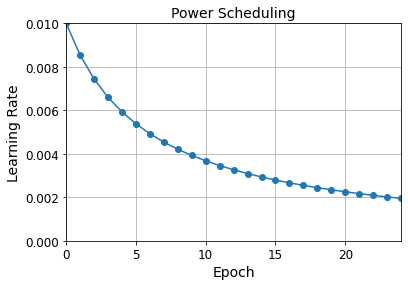

In [52]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

In [53]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [54]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [55]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [57]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)  
# exponential_decay_fn函数采用当前轮次并返回学习率，LearningRateScheduler将在每个轮次开始时更新优化器的learning_rate属性
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(X_valid_scaled, y_valid), 
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8592 - accuracy: 0.7536 - val_loss: 1.0316 - val_accuracy: 0.7192
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7209 - accuracy: 0.7933 - val_loss: 0.6471 - val_accuracy: 0.8084
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6105 - accuracy: 0.8197 - val_loss: 0.6699 - val_accuracy: 0.8018
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5524 - accuracy: 0.8353 - val_loss: 0.5264 - val_accuracy: 0.8438
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5089 - accuracy: 0.8490 - val_loss: 0.5576 - val_accuracy: 0.8442
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4537 - accuracy: 0.8640 - val_loss: 0.4743 - val_accuracy: 0.8570
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4227 - accuracy: 0.8704 - val_loss: 0.6122 - val_accuracy:

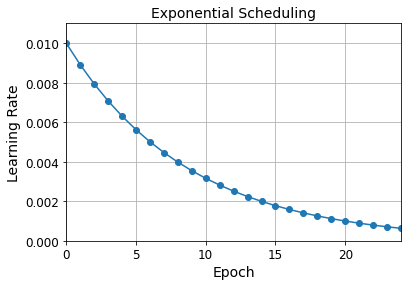

In [58]:
plt.plot(history.epoch, history.history['lr'], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [59]:
[name for name in dir(history) if not name.startswith("_")]

['epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [60]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(epoch / 20)

### Piecewise Constant Scheduling 

In [61]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [62]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn


piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [63]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8413 - accuracy: 0.7588 - val_loss: 0.8131 - val_accuracy: 0.7684
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8196 - accuracy: 0.7664 - val_loss: 0.7367 - val_accuracy: 0.8076
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7554 - accuracy: 0.7785 - val_loss: 0.7778 - val_accuracy: 0.7656
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9225 - accuracy: 0.7380 - val_loss: 0.9494 - val_accuracy: 0.7156
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0506 - accuracy: 0.6678 - val_loss: 0.9600 - val_accuracy: 0.6810
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6742 - accuracy: 0.7657 - val_loss: 0.6443 - val_accuracy: 0.8104
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5614 - accuracy: 0.8099 - val_loss: 0.7057 - val_accuracy:

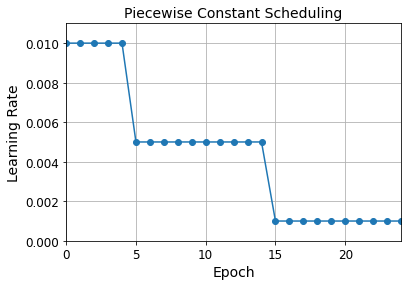

In [64]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [65]:
tf.random.set_seed(42)
np.random.seed(42)

In [66]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 1s 748us/step - loss: 0.5901 - accuracy: 0.8063 - val_loss: 0.4705 - val_accuracy: 0.8486
Epoch 2/25
1719/1719 [==============================] - 1s 740us/step - loss: 0.4954 - accuracy: 0.8400 - val_loss: 0.5755 - val_accuracy: 0.8342
Epoch 3/25
1719/1719 [==============================] - 1s 742us/step - loss: 0.5118 - accuracy: 0.8406 - val_loss: 0.4454 - val_accuracy: 0.8638
Epoch 4/25
1719/1719 [==============================] - 1s 745us/step - loss: 0.5193 - accuracy: 0.8453 - val_loss: 0.4953 - val_accuracy: 0.8584
Epoch 5/25
1719/1719 [==============================] - 1s 741us/step - loss: 0.5286 - accuracy: 0.8478 - val_loss: 0.6647 - val_accuracy: 0.8120
Epoch 6/25
1719/1719 [==============================] - 1s 736us/step - loss: 0.5213 - accuracy: 0.8525 - val_loss: 0.5768 - val_accuracy: 0.8536
Epoch 7/25
1719/1719 [==============================] - 1s 739us/step - loss: 0.5296 - accuracy: 0.8512 - val_loss: 0.5718 -

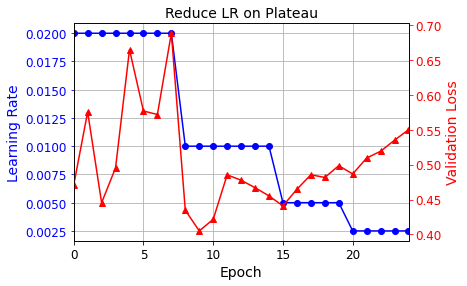

In [67]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [68]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 1s 766us/step - loss: 0.4894 - accuracy: 0.8274 - val_loss: 0.4092 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 1s 735us/step - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3737 - val_accuracy: 0.8692
Epoch 3/25
1719/1719 [==============================] - 1s 732us/step - loss: 0.3487 - accuracy: 0.8766 - val_loss: 0.3730 - val_accuracy: 0.8694
Epoch 4/25
1719/1719 [==============================] - 1s 764us/step - loss: 0.3263 - accuracy: 0.8836 - val_loss: 0.3493 - val_accuracy: 0.8802
Epoch 5/25
1719/1719 [==============================] - 1s 746us/step - loss: 0.3104 - accuracy: 0.8897 - val_loss: 0.3431 - val_accuracy: 0.8796
Epoch 6/25
1719/1719 [==============================] - 1s 739us/step - loss: 0.2957 - accuracy: 0.8951 - val_loss: 0.3415 - val_accuracy: 0.8812
Epoch 7/25
1719/1719 [==============================] - 1s 723us/step - loss: 0.2853 - accuracy: 0.8988 - val_loss: 0.3356 -

For piecewise constant scheduling, try this:

In [69]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])

# Avoiding Overfitting Through Regularization

### $\ell_1$ and $\ell_2$ regularization

In [70]:
layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", 
                          kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [71]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense, activation="elu", 
                          kernel_initializer="he_normal", 
                          kernel_regularizer=keras.regularizers.l2(0.01))


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.5816 - accuracy: 0.8115 - val_loss: 0.7197 - val_accuracy: 0.8302
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7210 - accuracy: 0.8276 - val_loss: 0.6862 - val_accuracy: 0.8360
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7013 - accuracy: 0.8329 - val_loss: 0.7039 - val_accuracy: 0.8314
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6942 - accuracy: 0.8359 - val_loss: 0.6776 - val_accuracy: 0.8440
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.8382 - val_loss: 0.6613 - val_accuracy: 0.8484
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6871 - accuracy: 0.8382 - val_loss: 0.6644 - val_accuracy: 0.8522
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6859 - accuracy: 0.8395 - val_loss: 0.6603 - val_accuracy:

## Dropout

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),  
    # 训练期间，随机丢弃一些输入(将它们设置为0)， 然后将剩其余输入除以保留概率。训练之后，它什么都不做，只是将输入传递到下一层
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5838 - accuracy: 0.7998 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4209 - accuracy: 0.8442 - val_loss: 0.3409 - val_accuracy: 0.8728
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3917 - accuracy: 0.8543 - val_loss: 0.3601 - val_accuracy: 0.8642
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3762 - accuracy: 0.8623 - val_loss: 0.3158 - val_accuracy: 0.8814
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3592 - accuracy: 0.8668 - val_loss: 0.3045 - val_accuracy: 0.8840
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3487 - accuracy: 0.8690 - val_loss: 0.3117 - val_accuracy: 0.8806
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3413 - accuracy: 0.8734 - val_loss: 0.3150 - val_accuracy:

## Alpha Dropout

In [73]:
tf.random.set_seed(42)
np.random.seed(42)

In [74]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 1s 855us/step - loss: 0.6654 - accuracy: 0.7597 - val_loss: 0.5935 - val_accuracy: 0.8422
Epoch 2/20
1719/1719 [==============================] - 1s 821us/step - loss: 0.5607 - accuracy: 0.7931 - val_loss: 0.5545 - val_accuracy: 0.8416
Epoch 3/20
1719/1719 [==============================] - 1s 833us/step - loss: 0.5285 - accuracy: 0.8052 - val_loss: 0.4834 - val_accuracy: 0.8588
Epoch 4/20
1719/1719 [==============================] - 1s 828us/step - loss: 0.5071 - accuracy: 0.8124 - val_loss: 0.4623 - val_accuracy: 0.8596
Epoch 5/20
1719/1719 [==============================] - 1s 826us/step - loss: 0.4920 - accuracy: 0.8182 - val_loss: 0.4566 - val_accuracy: 0.8580
Epoch 6/20
1719/1719 [==============================] - 1s 823us/step - loss: 0.4866 - accuracy: 0.8187 - val_loss: 0.4702 - val_accuracy: 0.8592
Epoch 7/20
1719/1719 [==============================] - 1s 822us/step - loss: 0.4719 - accuracy: 0.8251 - val_loss: 0.4723 -

In [75]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 600us/step - loss: 0.4437 - accuracy: 0.8694


[0.4436582624912262, 0.8694000244140625]

In [76]:
model.evaluate(X_train_scaled, y_train)
# 模型可能会过拟合训练集，但仍具有相似的训练损失和验证损失，所以请确保没有使用dropout来评估训练损失

1719/1719 [==============================] - 1s 595us/step - loss: 0.3292 - accuracy: 0.8892


[0.32918041944503784, 0.889163613319397]

In [77]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 1s 782us/step - loss: 0.4160 - accuracy: 0.8454


## MC Dropout

In [78]:
tf.random.set_seed(42)
np.random.seed(42)

In [79]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])

In [80]:
y_proba = y_probas.mean(axis=0)

In [81]:
y_std = y_probas.std(axis=0)  # 概率估计的标准差

In [82]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [83]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.17, 0.  , 0.4 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.89, 0.  , 0.11]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.01, 0.  , 0.58]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.16, 0.  , 0.82]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.18, 0.  , 0.65]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.61, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.3 , 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.02, 0.  , 0.27]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.11, 0.  , 0.83]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.07, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.  , 0.  , 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.08, 0.  , 0.16]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.38, 0.  , 0.09, 0.  , 0

In [84]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.13, 0.  , 0.68]],
      dtype=float32)

In [85]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.2 , 0.  , 0.29]],
      dtype=float32)

In [86]:
y_pred = np.argmax(y_proba, axis=1)

In [87]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8694

In [88]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 588us/step - loss: 0.4745 - accuracy: 0.8657


[0.47445884346961975, 0.8657000064849854]

In [89]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [90]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [91]:
mc_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

In [92]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [93]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [94]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.16, 0.  , 0.7 ]],
      dtype=float32)

## Max norm

In [95]:
layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", 
                          kernel_constraint=keras.constraints.max_norm(1.))

In [96]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4749 - accuracy: 0.8329 - val_loss: 0.3761 - val_accuracy: 0.8636
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3534 - accuracy: 0.8719 - val_loss: 0.3725 - val_accuracy: 0.8678
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3272 - accuracy: 0.8794 - val_loss: 0.3578 - val_accuracy: 0.8720
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3171 - accuracy: 0.8824 - val_loss: 0.3486 - val_accuracy: 0.8734
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3108 - accuracy: 0.8845 - val_loss: 0.3253 - val_accuracy: 0.8824
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3065 - accuracy: 0.8852 - val_loss: 0.3472 - val_accuracy: 0.8780
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.8859 - val_loss: 0.3390 - val_accuracy: